In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
train=imagenes
mean = imagenes.mean(axis=0)
std = imagenes.std(axis=0)
std[std==0]=1.0
for i in range(len(train)):
    train[i] = (train[i]-mean)/std

In [3]:
class Autoencoder2(torch.nn.Module):
    def __init__(self,fl,sl,k1,k2):
        super(Autoencoder2,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,fl, kernel_size=k1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(fl,sl,kernel_size=k2),
            torch.nn.ReLU(True),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(sl,fl,kernel_size=k2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(fl,1,kernel_size=k1),
            torch.nn.ReLU(True),)
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
class Autoencoder3(torch.nn.Module):
    def __init__(self,fl,sl,tl,k1,k2,k3):
        super(Autoencoder3,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,fl, kernel_size=k1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(fl,sl,kernel_size=k2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(sl,tl,kernel_size=k3),
            torch.nn.ReLU(True),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(tl,sl,kernel_size=k3),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(sl,fl,kernel_size=k2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(fl,1,kernel_size=k1),
            torch.nn.ReLU(True),)
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
class Autoencoder4(torch.nn.Module):
    def __init__(self,fl,sl,tl,fol,k1,k2,k3,k4):
        super(Autoencoder4,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,fl, kernel_size=k1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(fl,sl,kernel_size=k2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(sl,tl,kernel_size=k3),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(tl,fol,kernel_size=k4),
            torch.nn.ReLU(True),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(fol,tl,kernel_size=k4),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(tl,sl,kernel_size=k3),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(sl,fl,kernel_size=k2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(fl,1,kernel_size=k1),
            torch.nn.ReLU(True),)
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
num_epochs =100
distance = torch.nn.MSELoss()
NC=np.zeros(12)
lossl=np.zeros(12)
NL=np.zeros(12)
x_train = np.expand_dims(train, 1)
X_train= torch.autograd.Variable(torch.Tensor(x_train).float())
count=0
for i,A in enumerate([Autoencoder2,Autoencoder3,Autoencoder4]):
    l=i+2
    for j in range(4):
        print(i,j)
        layers=[random.randint(8,40) for x in range(l)]
        kernels=[random.randint(1,3) for x in range(l)]
        print(layers,kernels)
        model=A(*layers,*kernels)     
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)
        for epoch in range(num_epochs):
            output = model(X_train)
            loss = distance(output, X_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        N_c=0
        for m in model.parameters():
            N_c+=m.flatten().size()[0]
        NC[count]=N_c
        lossl[count]=loss.item()
        latent_space = model.encoder(X_train)
        NL[count]=latent_space.shape[3]
        count=count+1
        print(NC,NL,lossl)

0 0
[14, 17] [1, 2]
[1978.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.] [7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.33095801 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0 1
[30, 27] [2, 3]
[ 1978. 14908.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.] [7. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.33095801 0.33474064 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0 2
[36, 28] [3, 3]
[ 1978. 14908. 18893.     0.     0.     0.     0.     0.     0.     0.
     0.     0.] [7. 5. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.33095801 0.33474064 0.33573723 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0 3
[29, 39] [3, 2]
[ 1978. 14908. 18893.  9668.     0.     0.     0.     0.     0.     0.
     0.     0.] [7. 5. 4. 5. 0. 0. 0. 0. 0. 0. 0. 0.] [0.33095801 0.33474064 0.33573723 0.33940056 0.     

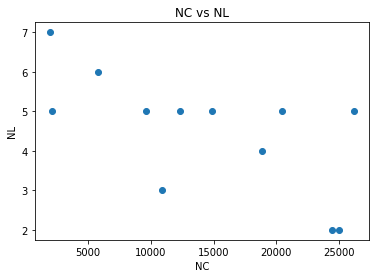

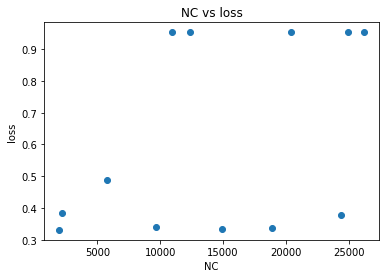

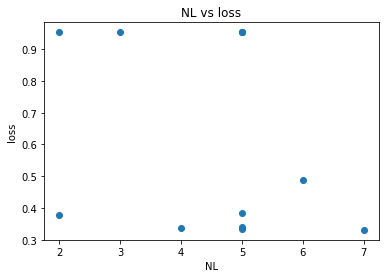

In [5]:
plt.figure()
plt.scatter(NC,NL)
plt.title("NC vs NL" )
plt.xlabel("NC")
plt.ylabel("NL")
plt.show()
plt.figure()
plt.scatter(NC,lossl)
plt.title("NC vs loss" )
plt.xlabel("NC")
plt.ylabel("loss")
plt.show()
plt.figure()
plt.scatter(NL,lossl)
plt.title("NL vs loss" )
plt.xlabel("NL")
plt.ylabel("loss")
plt.show()